In [15]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv('greencelldata.csv')
df.head()

,Values,Timestamp
0,100,26/6/2024 6:17
1,100,26/6/2024 6:18
2,100,26/6/2024 6:18
3,100,26/6/2024 6:18
4,100,26/6/2024 6:19


In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M')
df.dtypes

Values                int64
Timestamp    datetime64[ns]
dtype: object

In [18]:
df.set_index('Timestamp', inplace=True)


In [19]:
df.head()

,Values
Timestamp,
2024-06-26 06:17:00,100
2024-06-26 06:18:00,100
2024-06-26 06:18:00,100
2024-06-26 06:18:00,100
2024-06-26 06:19:00,100


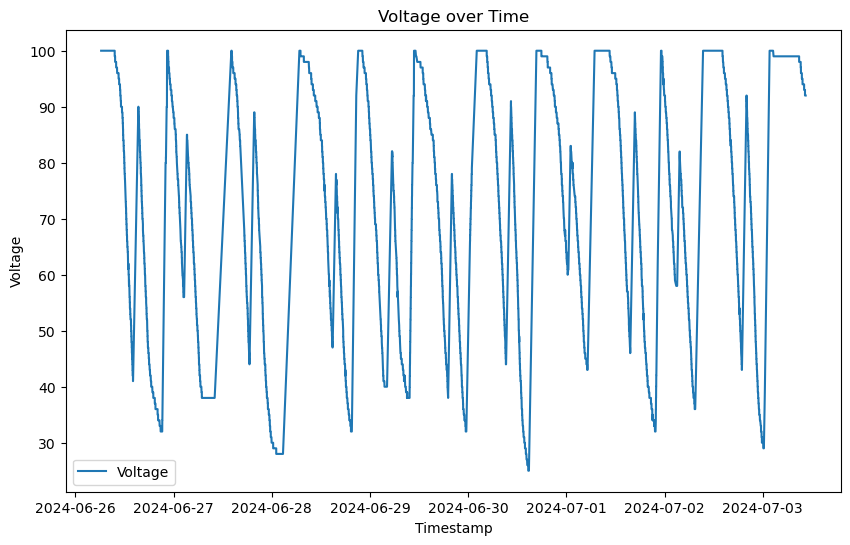

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Voltage')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.title('Voltage over Time')
plt.legend()
plt.show()


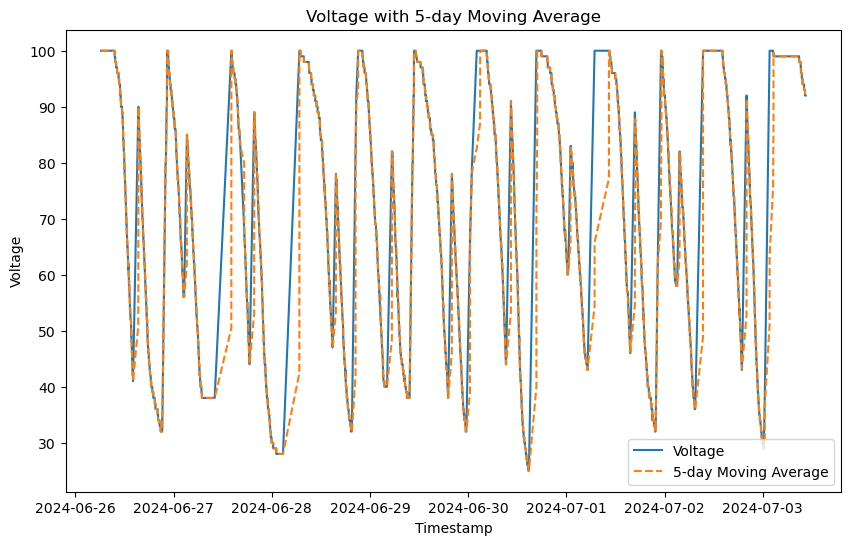

In [21]:
df['5-day MA'] = df['Values'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Voltage')
plt.plot(df.index, df['5-day MA'], label='5-day Moving Average', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.title('Voltage with 5-day Moving Average')
plt.legend()
plt.show()


In [22]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(df['Values'])
lows, _ = find_peaks(-df['Values'])

peaks_df = df.iloc[peaks]
lows_df = df.iloc[lows]

print('Peaks:')
print(peaks_df)
print('Lows:')
print(lows_df)


Peaks:
                     Values  5-day MA
Timestamp                            
2024-06-26 09:57:00      98      97.8
2024-06-26 10:58:00      93      92.8
2024-06-26 11:49:00      83      82.8
2024-06-26 12:01:00      79      78.8
2024-06-26 12:55:00      62      61.2
...                     ...       ...
2024-07-02 23:18:00      35      34.8
2024-07-02 23:43:00      32      31.6
2024-07-02 23:49:00      31      30.8
2024-07-03 00:09:00      30      29.8
2024-07-03 01:41:00     100      63.4

[109 rows x 2 columns]
Lows:
                     Values  5-day MA
Timestamp                            
2024-06-26 09:57:00      97      97.8
2024-06-26 10:58:00      92      92.8
2024-06-26 11:49:00      82      82.8
2024-06-26 12:01:00      78      78.8
2024-06-26 12:55:00      61      61.6
...                     ...       ...
2024-07-02 23:18:00      34      34.8
2024-07-02 23:43:00      31      31.8
2024-07-02 23:48:00      30      30.8
2024-07-03 00:09:00      29      29.8
2024-07-03 00

In [23]:
volt_less_than_20 = df[df['Values'] < 20]
print(volt_less_than_20)

Empty DataFrame
Columns: [Values, 5-day MA]
Index: []


In [24]:
df['Difference'] = df['Values'].diff()
accelerations = df[df['Difference'].diff() < 0]
downward_accelerations = accelerations[accelerations['Difference'] < 0]

print(downward_accelerations)


                     Values  5-day MA  Difference
Timestamp                                        
2024-06-26 09:36:00      99      99.8        -1.0
2024-06-26 09:42:00      98      98.8        -1.0
2024-06-26 09:57:00      97      97.8        -1.0
2024-06-26 09:58:00      97      97.8        -1.0
2024-06-26 10:11:00      96      96.8        -1.0
...                     ...       ...         ...
2024-07-03 09:21:00      96      96.8        -1.0
2024-07-03 09:34:00      95      95.8        -1.0
2024-07-03 09:44:00      94      94.8        -1.0
2024-07-03 10:07:00      93      93.8        -1.0
2024-07-03 10:20:00      92      92.8        -1.0

[1187 rows x 3 columns]


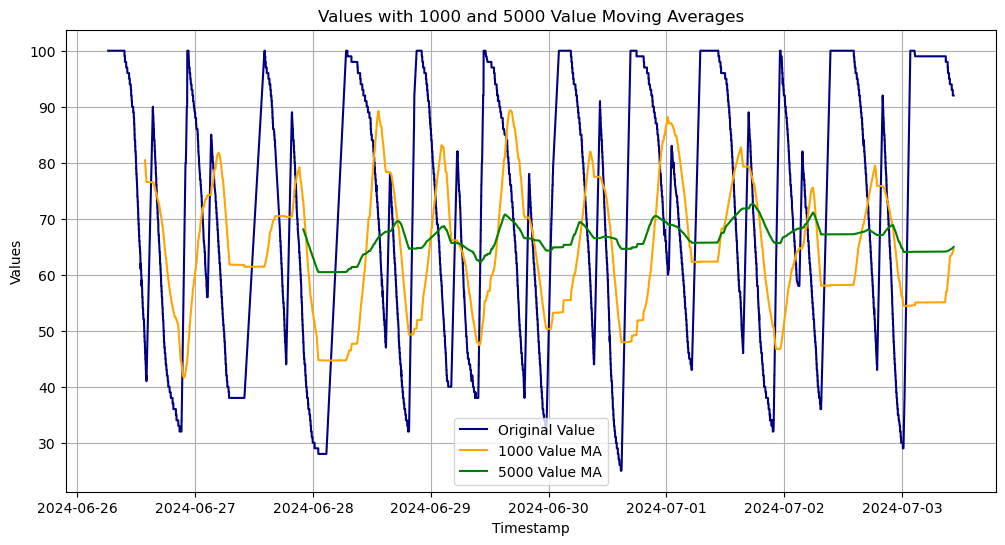

In [31]:
# Calculate moving averages
df['1000-Value MA'] = df['Values'].rolling(window=1000).mean()
df['5000-Value MA'] = df['Values'].rolling(window=5000).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Values'], label='Original Value', color='navy')
plt.plot(df.index, df['1000-Value MA'], label='1000 Value MA', color='orange')
plt.plot(df.index, df['5000-Value MA'], label='5000 Value MA', color='green')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Values with 1000 and 5000 Value Moving Averages')
plt.legend()
plt.grid(True)


plt.show()

## ON EXCEL


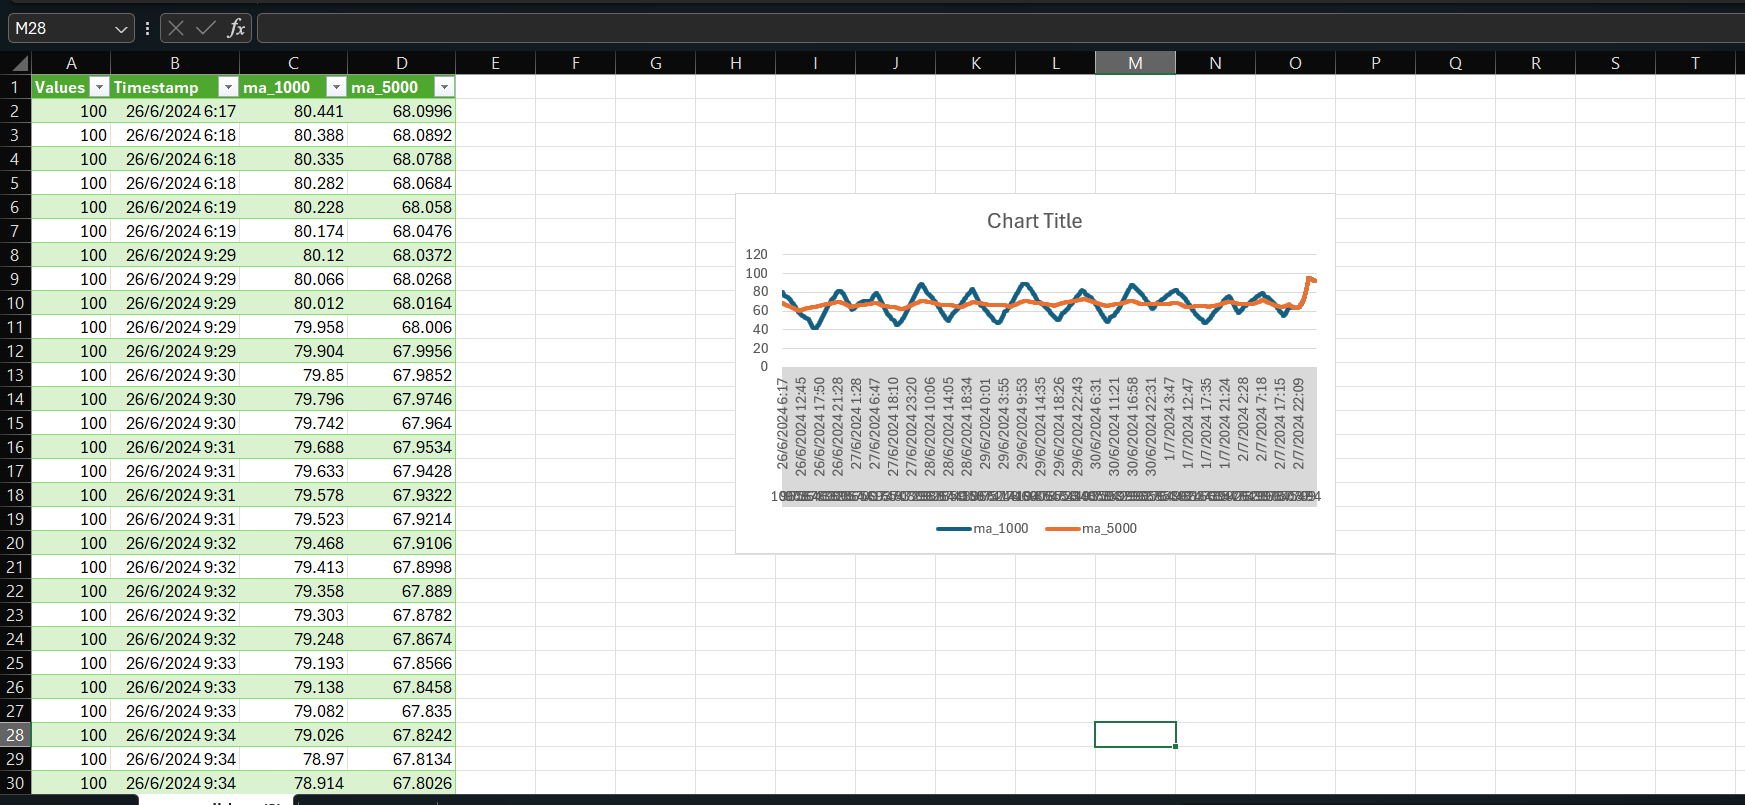

#### UANBLE TO LOAD THE TRENDLINE

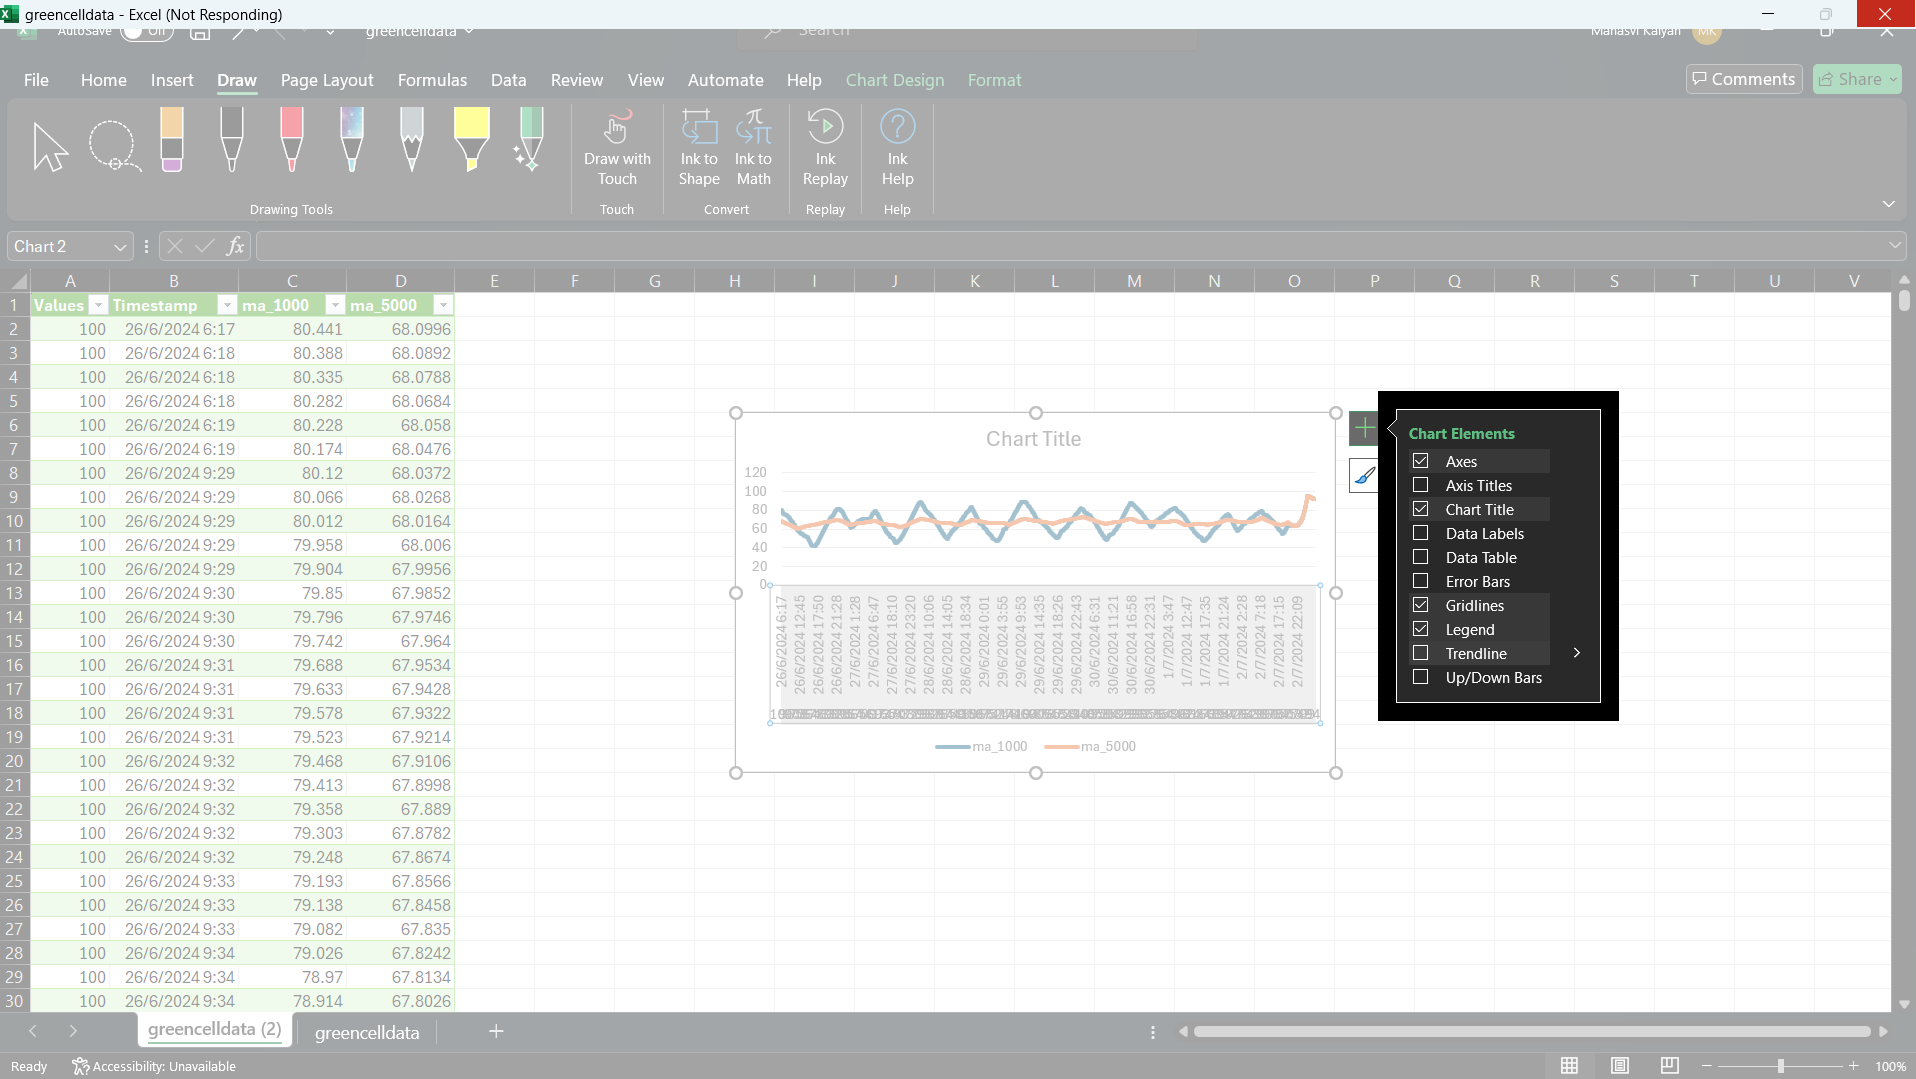